# card fraud data
### 특징 : imbalanced data 
##### classes : 0 --> 정상, 1 --> 비정상
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 데이터 분석 라이브러리 판다스
import pandas as pd

In [3]:
raw_df = pd.read_csv('creditcard.csv')

In [4]:
# 데이터 살펴보기 
# Missing Data가 있는지?
# 데이터 타입 확인 : 문자 데이터가 있다면 (대부분의 경우) categorical로 변경

raw_df.info()

# 약 28만 5천개의 데이터
# Missing Data는 없다.
# 모든 데이터는 수치형 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# PCA를 이용해 차원을 축소했음. 실제 컬럼명은 보안 이슈로 공개하지 않음.
# Feature 'Time' seconds elapsed between each transaction and the first transaction. 
# The feature 'Amount' is the transaction Amount
raw_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [6]:
# 피처(feature) 목록
raw_df.columns
# Class : 레이블

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# Imbalanced data
raw_df.value_counts('Class')
# 정상 데이터(0)이 사기 데이터(1)보다 훨씬 많다. -> 모델의 성능이 현저히 떨어짐.

Class
0    284315
1       492
dtype: int64

### 먼저 아무런 데이터 처리 없이 로지스틱 회귀 모델 만들어보기

In [8]:
# 피처 데이터와 레이블 데이터로 쪼개기
duplicated_df = raw_df.copy()

# feature data, 레이블을 제거
X = duplicated_df.drop('Class', axis=1)

# label
y = duplicated_df['Class']

In [9]:
# 학습 데이터와 테스트 데이터로 분할, stratify로 학습 데이터와 테스트 데이터의 레이블 비율을 일정하게 유지
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [10]:
# 정말 학습데이터와 테스트 데이터의 레이블 비율이 같은지 확인
print('학습 데이터 레이블 비율')
print(y_train.value_counts()/y_train.shape[0])
print('테스트 데이터 레이블 비율')
print(y_test.value_counts()/y_test.shape[0])

학습 데이터 레이블 비율
0    0.998271
1    0.001729
Name: Class, dtype: float64
테스트 데이터 레이블 비율
0    0.99828
1    0.00172
Name: Class, dtype: float64


In [11]:
# 대표적인 분류 모델 중 하나인 로지스틱 회귀 모델로 학습
# 로지스틱 회귀는 이름은 회귀(regression)이지만 분류(classification)에 사용됨.
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [12]:
# 정확도(accuracy) 측정
from sklearn.metrics import accuracy_score

# 테스트 피처 데이터로 예측
y_pred = log_reg.predict(X_test)

# 정확도(accuracy)
accuracy_score(y_test, y_pred)

0.9990519995786665

### 아무런 데이터 전처리도 없이 정확도가 99%?? 벌써 운영에 배포할 수 있는 모델을 완성한 것인가?
### 이진 분류(binary classification)에서 정확도(accuracy)는 믿을만한 지표가 아니다!!
##### 예를 들어 0~9까지 균등하게 들어 있는 데이터에서 값이 5면 1이고 값이 5가 아니면 0으로(즉, 0~4, 6~9) 이진 분류를 할 때
##### 무조건 레이블이 9이라고 예측한다면 테스트 데이터에서 5가 1일 확률은 10% 뿐이므로 정확도는 무조건 90%은 확보된다...

In [13]:
# 이진 분류의 성능을 측정할 때는 오차 행렬(Confusion Matrix)을 이용
#                    prediction(예측)
#          |      |  Neg  |  Pos
#           -----------------------   
#          |  Neg |  TN   |   FP
# real(실제)| ----------------------
#          |  Pos |  FN   |   TP

# 정확도(accuracy)
# (TN + TP) / (TN + FP + FN + TP)
# ex) 위 예시에서 테스트 데이터가 100개, 무조건 9라고 예측하면 FP -> 0, TP -> 0, TN = 90, FN = 10 이므로 90 / 90 + 10 
# 정밀도(precision)
# TP / (FP + TP)
# 재현율(recall)
# TP / (FN + TP)
# ex) 사기 방지 혹은 침입자 분류의 경우 재현율을 높여야 모든 사기 케이스와 모든 침입자를 찾아낼 수 있다. 
# 물론 진짜 사기가 아닌 케이스나 진짜 침입자가 아닌 경우는 많아질 것이지만...(정밀도는 낮아짐.)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[56850,    14],
       [   40,    58]])

In [14]:
precision = 55 / (16 + 55)
print(f'정밀도(precision) : {precision:.2f}')
recall = 55 / (43 + 55)
print(f'재현율(recall) : {recall:.2f}')

정밀도(precision) : 0.77
재현율(recall) : 0.56


In [15]:
# 정밀도(precision)와 재현율(recall) 측정
from sklearn.metrics import precision_score, recall_score

print(f'정밀도(precision) : {precision_score(y_test, y_pred):.2f}')
print(f'재현율(recall) : {recall_score(y_test, y_pred):.2f}')

정밀도(precision) : 0.81
재현율(recall) : 0.59


### 우리가 가장 주의 깊게 살펴봐야 할 재현율(recall)이 56%이므로 매우 낮다!!!
### 재현율을 높일 수 있는 방법이 없을까?

In [16]:
# 재현율을 높여보자!
thresholds = [threshold for threshold in range(-10, 10, 2)]
y_dec_func = log_reg.decision_function(X_test)
y_preds = [(y_dec_func > threshold).astype(int) for threshold in thresholds]

In [17]:
for idx, threshold in enumerate(thresholds):
    print(f'임곗값: {threshold}')
    print(f'정밀도(precision) : {precision_score(y_test, y_preds[idx]):.2f}')
    print(f'재현율(recall) : {recall_score(y_test, y_preds[idx]):.2f}')

# 임곗값이 음수이면 재현율 커지고 정밀도 낮아짐
# 임곗값이 0이면 predict() 호출을 통해 예측한 값
# 임곗값이 양수이면 재현율 작아지고 정밀도 커짐

임곗값: -10
정밀도(precision) : 0.00
재현율(recall) : 0.96
임곗값: -8
정밀도(precision) : 0.01
재현율(recall) : 0.90
임곗값: -6
정밀도(precision) : 0.02
재현율(recall) : 0.83
임곗값: -4
정밀도(precision) : 0.13
재현율(recall) : 0.77
임곗값: -2
정밀도(precision) : 0.52
재현율(recall) : 0.67
임곗값: 0
정밀도(precision) : 0.81
재현율(recall) : 0.59
임곗값: 2
정밀도(precision) : 0.85
재현율(recall) : 0.46
임곗값: 4
정밀도(precision) : 0.84
재현율(recall) : 0.38
임곗값: 6
정밀도(precision) : 0.83
재현율(recall) : 0.31
임곗값: 8
정밀도(precision) : 0.82
재현율(recall) : 0.23


### 정밀도와 재현율을 트레이드 오프 관계
### 재현율을 높이기 위해 무리하게 임곗값을 내리면 안된다!

In [18]:
#정밀도-재현율 트레이드 오프 시각화
from sklearn.model_selection import cross_val_predict

y_dec_funcs = cross_val_predict(log_reg, X_test, y_test, method='decision_function')

In [19]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_dec_funcs)

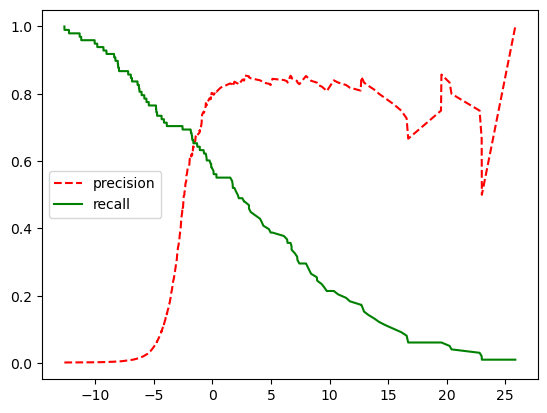

In [20]:
plt.plot(thresholds, precisions[:-1], 'r--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g', label='recall')
plt.legend()
plt.show()

### 정밀도와 재현율을 모두 고려한 점수 : F1 
##### F1 점수 : 정밀도와 재현율의 Harmonic mean
### F1 = 2 / ((1/precision) + (1/recall)) = TP / (TP + ((FN + FP) / 2))

In [21]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.6823529411764706

In [22]:
ths = [threshold for threshold in range(-10, 10, 2)]
for idx, threshold in enumerate(ths):
    print(f'임곗값: {threshold}')
    print(f'F1(F1 점수) : {f1_score(y_test, y_preds[idx]):.2f}')

임곗값: -10
F1(F1 점수) : 0.01
임곗값: -8
F1(F1 점수) : 0.01
임곗값: -6
F1(F1 점수) : 0.04
임곗값: -4
F1(F1 점수) : 0.23
임곗값: -2
F1(F1 점수) : 0.59
임곗값: 0
F1(F1 점수) : 0.68
임곗값: 2
F1(F1 점수) : 0.60
임곗값: 4
F1(F1 점수) : 0.52
임곗값: 6
F1(F1 점수) : 0.45
임곗값: 8
F1(F1 점수) : 0.37
